Alejandro Rodríguez Mesa

Colección de tareas de la práctica 2

#Paquetes necesarios

In [1]:
import cv2  as cv
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

(512, 512, 3)


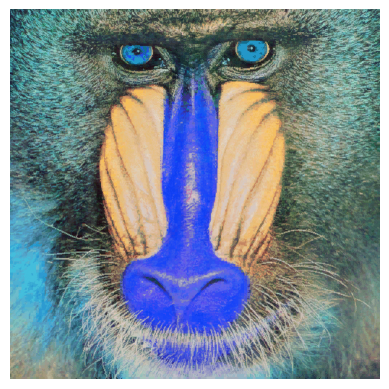

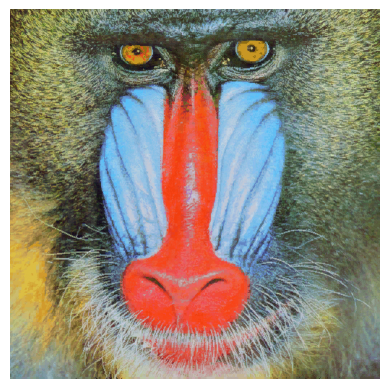

In [6]:
#Lee imagen de archivo
img = cv.imread('mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    #Muestra dimensiones
    print(img.shape)
    #Mostramos la imagen original con matplotlib
    plt.figure()
    #Eliminamos etiquetas de los ejes
    plt.axis("off")
    plt.imshow(img) 
    plt.show()

    #Recordar que OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    #Muestra la imagen tras convertir a RGB
    #Eliminamos etiquetas de los ejes
    plt.figure()
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()
else: 
    print('Imagen no encontrada')

Convierte a grises para procesamiento posterior

In [ ]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de contornos multietapa. Tratado en las sesiones de teoría (tema 4)

In [ ]:
#Obtiene contornos con el operador de Canny
canny = cv.Canny(gris, 100, 200)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()


# Tarea 1

**Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.**

In [ ]:
# Cuenta el número de píxeles blancos (255) por columna
col_counts = cv.reduce(canny, 0, cv.REDUCE_SUM, dtype=cv.CV_32SC1)
cols = col_counts[0] / (255 * canny.shape[0])  # Normalizamos por el valor máximo de píxel (255)

# Cuenta el número de píxeles blancos (255) por fila
row_counts = cv.reduce(canny, 1, cv.REDUCE_SUM, dtype=cv.CV_32SC1)
rows = row_counts[:, 0] / (255 * canny.shape[1])  # Normalizamos por el valor máximo de píxel (255)

# Determina el máximo de píxeles blancos en filas y columnas
max_cols = np.max(cols)
max_rows = np.max(rows)

# Cuenta el número de filas con un número de píxeles blancos >= 0.95 * máximo de filas
threshold = 0.95 * max_rows
num_high_white_rows = np.sum(rows >= threshold)

# Mostrar los resultados
print(f"Porcentaje de píxeles blancos por columna: {max_cols}")
print(f"Porcentaje de píxeles blancos por fila: {max_rows}")
print(f"Número de filas con píxeles blancos >= 0.95 * máximo de filas: {num_high_white_rows}")

# Mostrar los resultados gráficamente
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

# Gráfico de la distribución de píxeles blancos por columnas
plt.subplot(1, 3, 2)
plt.title("Píxeles Blancos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Número de Píxeles")
plt.plot(cols)
plt.xlim([0, canny.shape[1]])

# Gráfico de la distribución de píxeles blancos por filas
plt.subplot(1, 3, 3)
plt.title("Píxeles Blancos por Fila")
plt.xlabel("Filas")
plt.ylabel("Número de Píxeles")
plt.plot(rows)
plt.xlim([0, canny.shape[0]])

plt.tight_layout()
plt.show()

# Tarea 2

**Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?**

In [ ]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv.Sobel(ggris, cv.CV_64F, 1, 0)  # x
sobely = cv.Sobel(ggris, cv.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv.add(sobelx, sobely)

#Conversión a 8 bits la imagen sobel
sobel8_v2 = np.uint8(sobel)

valorUmbral = 1 #Al cambiar el valor obviamente cambiarán el número de pixeles blancos
res, imagenUmbralizada = cv.threshold(sobel8_v2, valorUmbral, 255, cv.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray')
plt.show()

# Cuenta el número de píxeles blancos (255) por columna
col_counts = cv.reduce(imagenUmbralizada, 0, cv.REDUCE_SUM, dtype=cv.CV_32SC1)
cols = col_counts[0] / (255 * imagenUmbralizada.shape[0])  # Normalizamos por el valor máximo de píxel (255)

# Cuenta el número de píxeles blancos (255) por fila
row_counts = cv.reduce(imagenUmbralizada, 1, cv.REDUCE_SUM, dtype=cv.CV_32SC1)
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[1])  # Normalizamos por el valor máximo de píxel (255)

# Determina el máximo de píxeles blancos en filas y columnas
max_cols = np.max(cols)
max_rows = np.max(rows)

# Cuenta el número de filas con un número de píxeles blancos >= 0.95 * máximo de filas
threshold_row = 0.95 * max_rows
num_high_white_rows = np.sum(rows >= threshold_row)

threshold_cols= 0.95 * max_cols
num_high_white_cols = np.sum(cols >= threshold_cols)

# Mostrar los resultados
print(f"Porcentaje de píxeles blancos por columna: {max_cols}")
print(f"Porcentaje de píxeles blancos por fila: {max_rows}")
print(f"Número de filas más de un 95% de píxeles blancos: {num_high_white_rows}")
print(f"Número de columnas con más de un 95% de píxeles blancos: {num_high_white_cols}")



In [ ]:
# Gráfico de la distribución de píxeles blancos por columnas
plt.subplot(1, 3, 2)
plt.title("Píxeles Blancos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Número de Píxeles")
plt.plot(cols)
plt.xlim([0, imagenUmbralizada.shape[1]])

# Gráfico de la distribución de píxeles blancos por filas
plt.subplot(1, 3, 3)
plt.title("Píxeles Blancos por Fila")
plt.xlabel("Filas")
plt.ylabel("Número de Píxeles")
plt.plot(rows)
plt.xlim([0, imagenUmbralizada.shape[0]])

plt.tight_layout()
plt.show()

# Tarea 3

**Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.**

In [10]:
import cv2
import numpy as np

# Función de callback que se usa en el trackbar para actualizar el umbral
def update_r(x):
    global r
    r = x

# Función de callback que se usa en el trackbar para ajustar el brillo
def update_brightness(x):
    global brightness
    brightness = x - 100  # Desplazamos el rango a -100 a 100 para el brillo

# Inicializa la captura de video desde la cámara
vid = cv2.VideoCapture(0)

# Valor inicial del umbral y brillo
r = 127
brightness = 0

# Crea una ventana para mostrar el resultado
cv2.namedWindow("Procesamiento")

# Crea un trackbar para ajustar el valor de 'r'
cv2.createTrackbar('Umbral', 'Procesamiento', r, 255, update_r)

# Crea un trackbar para ajustar el brillo
cv2.createTrackbar('Brillo', 'Procesamiento', 100, 200, update_brightness)  # Rango de 0 a 200

# Variable para controlar el modo de procesamiento actual
modo = 'O'  # Modo por defecto (Original)

# Instrucciones a mostrar
instructions = [
    "Modos disponibles:",
    "  'O' - Modo Original",
    "  'L' - Deteccion de Bordes",
    "  'G' - Convertir a Escala de Grises",
    "  'U' - Umbralizacion",
    "  'S' - Suavizado Gaussiano",
    "Ajuste de controles:",
    "  Ajuste el brillo con el slider 'Brillo'",
    "  Ajuste el umbral con el slider 'Umbral'",
    "  Presione 'ESC' para salir"
]

# Cargar la imagen de fondo y procesarla
background_image = cv2.imread("background.png")  # Asegúrate de que la imagen esté en la misma carpeta o proporciona la ruta correcta
background_image = cv2.resize(background_image, (640, 480))  # Ajustar el tamaño a lo que necesites

# Procesar la imagen de fondo para resaltar las líneas
gray_background = cv2.cvtColor(background_image, cv2.COLOR_BGR2GRAY)
blurred_background = cv2.GaussianBlur(gray_background, (3, 3), 0)  # Suavizado
sobel_x = cv2.Sobel(blurred_background, cv2.CV_64F, 1, 0)  # Filtro Sobel en dirección x
sobel_y = cv2.Sobel(blurred_background, cv2.CV_64F, 0, 1)  # Filtro Sobel en dirección y
sobel = cv2.add(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))  # Combina ambos resultados



# Mensaje de información sobre el uso del menú
info_message = "Presiona 'H' para ver el menu de uso."
show_info_message = True  # Variable para controlar la visualización del mensaje

# Umbralizar la imagen
valorUmbral = 130
_, thresholded_image = cv2.threshold(sobel, valorUmbral, 255, cv2.THRESH_BINARY)
# Variable para almacenar la imagen de fondo procesada
processed_background_image = thresholded_image.copy()

while True:
    ret, image = vid.read()

    # Si la captura es correcta
    if not ret:
        break

    # Ajustar brillo
    adjusted_image = cv2.convertScaleAbs(image, alpha=1, beta=brightness) 
    # Modo espejo
    adjusted_image = cv2.flip(adjusted_image, 1)

    # Procesamiento según la tecla presionada usando match-case
    match modo:
        case 'O':  # Modo original
            display_image = adjusted_image.copy()

            # Mostrar el mensaje de información solo en modo original
            if show_info_message:
                cv2.putText(display_image, info_message, (50, 450), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)

        case 'L':  # Detección de bordes usando Sobel
            # Aplicar suavizado Gaussiano
            img = cv2.GaussianBlur(adjusted_image, (5, 5), 0)

            # Aplicar la detección de bordes con el valor de 'r' que controla el slider
            sobel_x = cv2.Canny(img, 0, r)
            sobel_y = cv2.Canny(img, 0, r)

            # Sumar las magnitudes de los bordes en ambas direcciones
            sobel_magnitude = cv2.add(sobel_x, sobel_y)

            # Convertir a imagen de 8 bits
            sobel_magnitude = np.uint8(sobel_magnitude)

            # Aplicar umbralización a la imagen resultante
            _, thresholded_image = cv2.threshold(sobel_magnitude, 0, 255, cv2.THRESH_BINARY)

            # Mostrar la imagen con las líneas detectadas
            display_image = thresholded_image

            # Ocultar el mensaje de información
            show_info_message = False

        case 'G':  # Convertir a escala de grises
            gray_image = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)
            display_image = gray_image

            # Ocultar el mensaje de información
            show_info_message = False

        case 'U':  # Umbralización controlada por el slider
            gray_image = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)
            # Aplicar umbralización con el valor de 'r' controlado por el trackbar
            _, thresholded_image = cv2.threshold(gray_image, r, 255, cv2.THRESH_BINARY)
            display_image = thresholded_image

            # Ocultar el mensaje de información
            show_info_message = False

        case 'S':  # Suavizado Gaussiano / Desenfoque
            # Aplicar desenfoque Gaussiano con el tamaño controlado por 'r'
            blurred_image = cv2.GaussianBlur(adjusted_image, (2 * (r // 10) + 1, 2 * (r // 10) + 1), 0)
            display_image = blurred_image
            
            # Ocultar el mensaje de información
            show_info_message = False
            
        case 'H':  # Modo de instrucciones
            display_image = processed_background_image.copy()  # Usar la imagen de fondo procesada
            # Añadir instrucciones sobre la imagen de fondo
            cv2.putText(display_image, "Instrucciones", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            for i, line in enumerate(instructions):
                cv2.putText(display_image, line, (20, 100 + i * 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (225, 225, 225), 1, cv2.LINE_AA)
            show_info_message = False

    # Mostrar la imagen procesada o la imagen de instrucciones
    cv2.imshow("Procesamiento", display_image)

    # Leer la tecla presionada
    key = cv2.waitKey(20) & 0xFF

    if key == 27:  # Si se presiona la tecla ESC (código 27), salir del bucle
        break
    elif key == ord('l'):  # Si se presiona la tecla 'L'
        modo = 'L'
    elif key == ord('g'):  # Si se presiona la tecla 'G'
        modo = 'G'
    elif key == ord('u'):  # Si se presiona la tecla 'U' para el modo umbralización
        modo = 'U'
    elif key == ord('s'):  # Si se presiona la tecla 'S'
        modo = 'S'
    elif key == ord('o'):  # Si se presiona la tecla 'O' para volver al modo original
        modo = 'O'
        show_info_message = True  # Mostrar el mensaje de información de nuevo al volver al modo original
    elif key == ord('h'):  # Si se presiona la tecla 'H' para ver las instrucciones
        modo = 'H'

# Liberar la cámara y cerrar las ventanas
vid.release()
cv2.destroyAllWindows()


# Tarea 4

Esto es un videojuego cuyo objetivo es evitar que la pelota caiga (Se recomienda pared plana de fondo, y cámara alejada). Deben haber el menor número de obstáctulos que sean detectados como contornos. Preferiblemente usar ropa de un color distinto al de la pared. Una vez te marcan 20 goles, pierdes. ¡Intenta superar mi world record!

In [8]:
import random
import time

# Inicializamos la captura de video
vid = cv.VideoCapture(0)

# Definimos la clase para la pelota
class Ball:
    def __init__(self, radius, x, y):
        self.radius = radius
        self.x = int(x)  # Aseguramos que x sea un entero
        self.y = int(y)  # Aseguramos que y sea un entero
        self.dx = random.choice([-5, 5])  # Velocidad aleatoria en x
        self.dy = random.choice([-5, 5])  # Velocidad aleatoria en y
        self.collision = True

    def move(self):
        self.x += self.dx
        self.y += self.dy

    def draw(self, frame):
        # Asegurarse de que las coordenadas están dentro de los límites antes de dibujar
        if 0 <= self.x <= frame.shape[1] and 0 <= self.y <= frame.shape[0]:
            cv.circle(frame, (self.x, self.y), self.radius, (0, 255, 0), -1)

    def check_collision(self, contours):
        # Verifica colisiones con los contornos
        if self.collision:
            for contour in contours:
                distance = cv.pointPolygonTest(contour, (self.x, self.y), True)
                if abs(distance) < self.radius:  # Colisión detectada
                    self.dy = -abs(self.dy)  # Cambiamos la dirección hacia arriba
                    if self.dx != 0:  # Solo cambiar dx si ya tiene una dirección
                        self.dx = random.choice([-5, 5])  # Cambia aleatoriamente la dirección en x


# Función para aplicar el efecto de línea y obtener contornos
def line_effect(frame):
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    blurred_frame = cv.GaussianBlur(gray_frame, (5, 5), 0)
    edges = cv.Canny(blurred_frame, 25, 150)
    contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Creamos una máscara en negro
    mask = np.zeros_like(frame)
    cv.drawContours(mask, contours, -1, (255, 255, 255), 1)
    colored_frame = cv.addWeighted(frame, 0.7, mask, 0.3, 0)

    return colored_frame, contours

# Inicializamos las pelotas dentro de los límites del marco
balls = [Ball(radius=10, x=random.randint(10, 630), y=random.randint(10, 90)) for _ in range(10)]

# Almacenamos el tiempo del último lote de pelotas y el tiempo de velocidad
last_spawn_time = time.time()
last_speed_increase_time = time.time()

# Inicializamos variables para el juego
goals = 0
start_time = time.time()
game_over = False

# Inicializamos las pelotas dentro de los límites del marco
original_speed = 5  # Velocidad original
balls = [Ball(radius=10, x=random.randint(10, 630), y=random.randint(10, 90)) for _ in range(10)]

# Cambia la velocidad de la pelota
def increase_speed(ball):
    ball.dx *= 2
    ball.dy *= 2

def reset_speed(ball):
    ball.dx = original_speed * random.choice([-1, 1])  # Restablecer a velocidad original
    ball.dy = original_speed * random.choice([-1, 1])



while True:
    ret, frame = vid.read()

    
    if ret:
        frame = cv.flip(frame, 1) 
        
        body_frame, contours = line_effect(frame)

        # Mover, dibujar y verificar colisiones para cada pelota
        for ball in balls:
            ball.move()
            ball.check_collision(contours)
            ball.draw(body_frame)

            # Colisiones con los bordes
            if ball.x - ball.radius <= 0:  # Colisión izquierda
                ball.x = ball.radius  # Reubicar la pelota
                ball.dx = abs(ball.dx)  # Cambiar dirección a la derecha
            elif ball.x + ball.radius >= frame.shape[1]:  # Colisión derecha
                ball.x = frame.shape[1] - ball.radius  # Reubicar la pelota
                ball.dx = -abs(ball.dx)  # Cambiar dirección a la izquierda
            if ball.y - ball.radius <= 0:  # Colisión superior
                ball.y = ball.radius  # Reubicar la pelota
                ball.collision = True
                ball.dy = abs(ball.dy)  # Cambiar dirección hacia abajo
                
                reset_speed(ball)  # Restablecer velocidad al tocar el borde superior
            elif ball.y + ball.radius >= frame.shape[0]:  # Colisión inferior
                goals += 1  # Aumentar goles
                
                ball.y = frame.shape[0] - ball.radius  # Reubicar la pelota hacia arriba
                ball.dy = -abs(ball.dy)  # Cambiar dirección hacia arriba
                ball.collision = False
                increase_speed(ball)  # Duplicar velocidad al tocar el borde inferior

                body_frame[frame.shape[0]-10:, :] = (0, 0, 255)  # Cambiar solo el borde inferior


    # Verificar si el juego ha terminado
    if goals >= 20:
        game_over = True

    # Mostrar el fotograma resultante con el efecto de contornos de línea
    if game_over:
        # Mostrar GAME OVER
        red_background = np.zeros_like(body_frame)
        red_background[:] = [0, 0, 255]  # Rellenar con color rojo el fondo
        game_over_text = "GAME OVER!"
        time_text = f'TIEMPO: {int(time.time() - start_time)}s'
        goals_text = f'GOLES: {goals}'

        # Obtener el tamaño del texto
        text_size_game_over = cv.getTextSize(game_over_text, cv.FONT_HERSHEY_SIMPLEX, 3, 5)[0]
        text_size_time = cv.getTextSize(time_text, cv.FONT_HERSHEY_SIMPLEX, 2, 3)[0]
        text_size_goals = cv.getTextSize(goals_text, cv.FONT_HERSHEY_SIMPLEX, 2, 3)[0]

        # Calcular las posiciones centradas
        game_over_x = (body_frame.shape[1] - text_size_game_over[0]) // 2
        game_over_y = (body_frame.shape[0] - text_size_game_over[1]) // 2
        time_x = (body_frame.shape[1] - text_size_time[0]) // 2
        time_y = game_over_y + text_size_game_over[1] + 50  # Espaciado entre los textos
        goals_x = (body_frame.shape[1] - text_size_goals[0]) // 2
        goals_y = time_y + text_size_time[1] + 20  # Espaciado entre el tiempo y los goles

        # Fondo rojo
        body_frame[:] = red_background

        # Dibujar el texto centrado en negro
        cv.putText(body_frame, game_over_text, (game_over_x, game_over_y), cv.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 0), 5)
        cv.putText(body_frame, time_text, (time_x, time_y), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)  # Tiempo en blanco
        cv.putText(body_frame, goals_text, (goals_x, goals_y), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)  # Goles en blanco
        
        cv.imshow('Multiple Balls Collision Detection', body_frame)
        cv.waitKey(5000)  # Mostrar por 5 segundos
        break
    else:
        # Mostrar el contador de goles
        goals_text = f'GOLES: {goals}'
        time_text = f'TIEMPO: {int(time.time() - start_time)}s'  # Actualizar el tiempo
        cv.putText(body_frame, goals_text, (10, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)  # Goles
        cv.putText(body_frame, time_text, (10, 100), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)  # Tiempo

    cv.imshow('Multiple Balls Collision Detection', body_frame)

    # Si se presiona la tecla 'ESC', salimos del bucle
    if cv.waitKey(20) == 27:
        break

# Libera el objeto de captura y cierra las ventanas
vid.release()
cv.destroyAllWindows() 